# Data Visualization in Python

Python has a whole range of libraries for visualizing data.
We will take a look at **matplotlib**, **seaborn** and the direct visualization methods of **pandas**.
The latter two are based on matplotlib and are high-level interfaces to it.

### Types of Variables

We will see that different charts are available for different types of variables to be visualized.
A distinction is first made between categorical and numerical variables. These are in turn subdivided into subtypes:

- Categorical variable:
    - Nominal variable: without intrinsic sorting (e.g. place of birth [Aschaffenburg, Hanau, ...], field of study [software design, mechatronics, ...])
    - Ordinal variable: with intrinsic sorting (e.g. T-shirt sizes [XS < S < M < L < XL], days of the week [Monday < Tuesday < ...])
- Numerical features:
    - Discrete variable: only a finite (or countable) number of possible values (e.g. number of siblings [0, 1, 2, ...], number of lecture participants)
    - Continuous variable: uncountable number of possible values, i.e. any intermediate value possible (e.g. height [174.583cm], temperatures)

## Matplotlib

Good sources:
- https://matplotlib.org/stable/users/explain/quick_start.html
- https://matplotlib.org/cheatsheets/
- https://matplotlib.org/stable/gallery/index.html
- https://www.python-graph-gallery.com/

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Comic Sans MS')
#plt.rc('font', family='Kristen ITC')

Matplotlib distinguishes between `Figure` (the entire drawing area) and `Axes` (a part of the drawing area with a coordinate system).
A figure can also contain several axes.
The actual data is entered in the axes.
(Note: axis (singular; like: x-axis of a plot), axes (plural)).

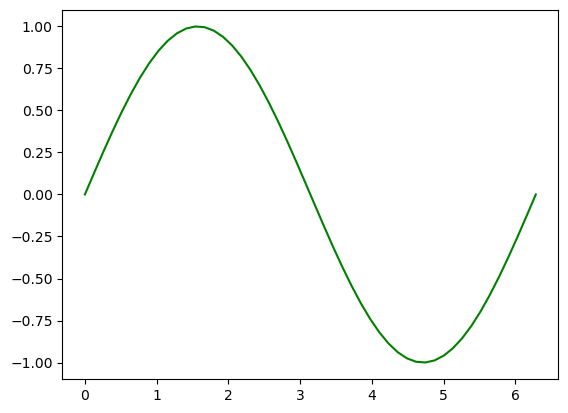

In [7]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y, color="green")
plt.show()

The division of a Matplotlib graphic into Figure, Axes and the various sub-elements of an Axes can best be seen in the image:

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="Struktur einer Matplotlib-Graphik" width="400"/>

The small data set *tips* contains all the feature types mentioned above.
It serves as an example in this tutorial.

In [18]:
tips = pd.read_csv("tips.csv")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A first typical chart in Matplotlib:

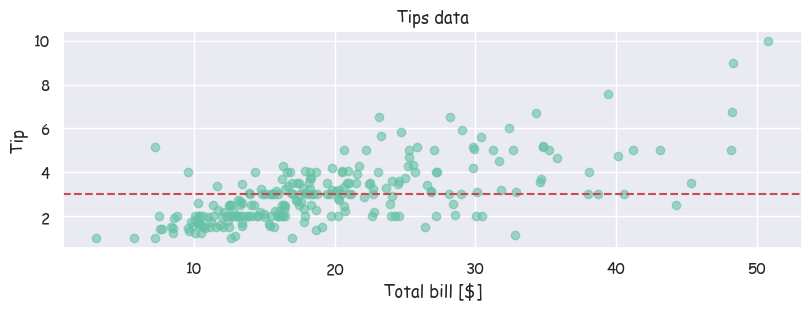

In [86]:
fig, ax = plt.subplots(figsize=(8, 3), layout="constrained")
ax.scatter(x=tips["total_bill"], y=tips["tip"], alpha=0.6)
ax.axhline(y=tips["tip"].mean(), color="r", linestyle="dashed") 
ax.set_xlabel("Total bill [$]")
ax.set_ylabel("Tip")
ax.set_title("Tips data")
plt.show()

The plots can be modified **almost arbitrarily**. 
Colors, sizes, marching style, line widths, line style and much more can be adapted in various ways.

In [20]:
fig.savefig("tips_figure.png")

There are basically two possible ways to use Matplotlib:
 - object-oriented API
 - procedural pyplot API (This is not recommended.)

In the examples above, we have used the object-oriented API.

The procedural pyplot interface is historically based on the plot functions of MATLAB. In it, figures and axes are handled implicitly and only their status is ever updated. **The object-oriented interface is generally recommended.**

### Histograms

First, let's look at the distribution of total bills.
Histograms are suitable for visualizing one-dimensional numerical data.
They allow you to recognize the extreme values and frequency ranges at a glance.

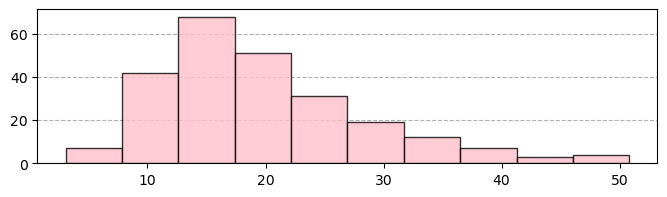

In [29]:
fig, ax = plt.subplots(figsize=(8,2))
ax.hist(tips["total_bill"],facecolor = "pink", edgecolor="black", alpha=0.8)
ax.yaxis.grid(linestyle="dashed")
ax.set_axisbelow(True)
plt.show()

### Barplots

We want to count how often the individual days of the week occur in the data set.
Barplots are often suitable for one-dimensional categorical data.
In the case of ordinal data, the intrinsic order of the values should be taken into account.

In [35]:
tips["day"] = pd.Categorical(tips["day"], categories=["Thur", "Fri", "Sat", "Sun"], ordered=True)
data = tips.groupby("day").size()
data

/var/folders/w3/lmhpkytn26nd5ywhlkymr8ph0000gn/T/ipykernel_73235/2700049720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = tips.groupby("day").size()


day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

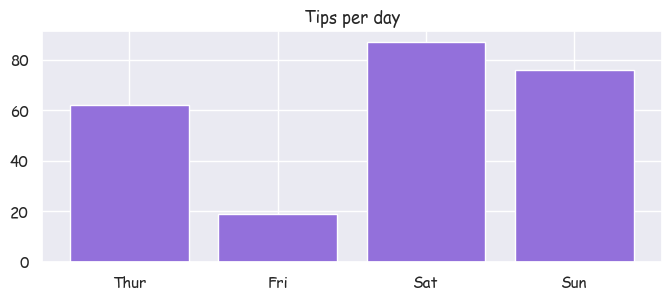

In [47]:
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(data.index, data.values, facecolor="mediumpurple")
ax.set_title("Tips per day")
plt.show()

Now we would also like to break down the days of the week by gender and show the average tips.
We therefore need to look at two categorical variables at the same time.
Depending on the focus, stacked or grouped bar charts are suitable for this.

### Scatter plots

Two-dimensional metric data can be displayed well in a scatterplot.
If you also vary the color, size or the marker symbol, you can also easily visualize other aspects (dimensions).

Here we want to plot the tip against the total bill and differentiate between lunch and dinner by color.
Since a lot of information is lost in dense areas due to overplotting, you can reduce the color saturation, for example.

With bar plots, histograms and scatter plots, you can get surprisingly far in practice.
However, the variety of possible visualizations is huge and it is advisable to explore them a little.
Inspiration and code examples can be found at https://matplotlib.org/stable/gallery/index.html or https://www.python-graph-gallery.com, for example.

## Seaborn

- Tutorial: https://seaborn.pydata.org/tutorial.html
- Examples: https://seaborn.pydata.org/examples/index.html

Seaborn is a visualization library that is based on Matplotlib and works well with Pandas.
While Matplotlib can be used to assemble arbitrarily complicated graphs, Seaborn aims to provide a high-level interface to visualize the statistical relationships between different characteristics in the simplest possible way.


In [43]:
import seaborn as sns

sns.set_theme()

A simple histogram.

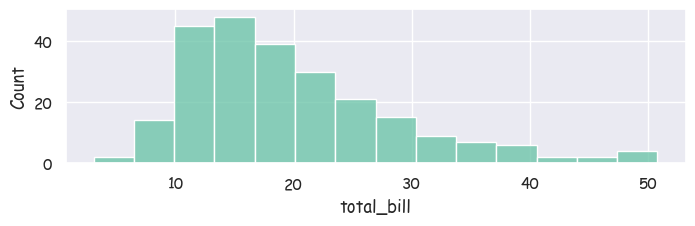

In [62]:
fig, ax = plt.subplots(figsize=(8,2))
sns.histplot(data=tips, x="total_bill", ax=ax) #ax=ax:
plt.show()

To replicate our above barplot the necessary aggregations are even done by seaborn.

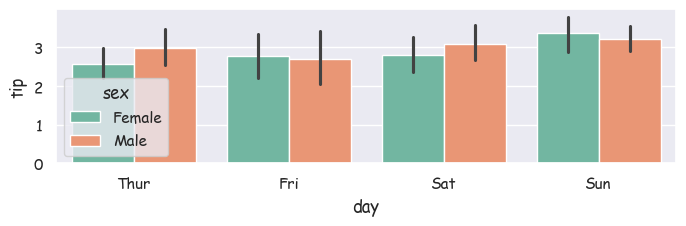

In [75]:
fig, ax = plt.subplots(figsize=(8,2))
#sns.countplot(data=tips, x="day", hue="sex", ax=ax) #ax=ax:
sns.set_palette("Set2")
sns.barplot(data=tips, x="day", y="tip", hue = "sex",ax=ax)
plt.show()

Seaborn has three main functions to enable a series of graphs:
- `relplot()` (relational): scatterplot, lineplot
- `displot()` (distribution): histplot, kdeplot, ecdfplot, rugplot
- `catplot()` (categorical): strippplot, swarmplot, boxplot, violinplot, pointplot, barplot

The first-mentioned main functions are figure-level functions. They internally call one of the following axes-level functions, which can be controlled via the *kind* argument. (Example: `relplot` uses scatterplot by default, i.e. `kind="scatter"`, and `kind="line"` could be used to generate a line plot). However, you can also work directly with the axes level functions (e.g. `sns.lineplot()`).

In addition to these main functions, there are also `jointplot()` and `pairplot()`, which work differently.

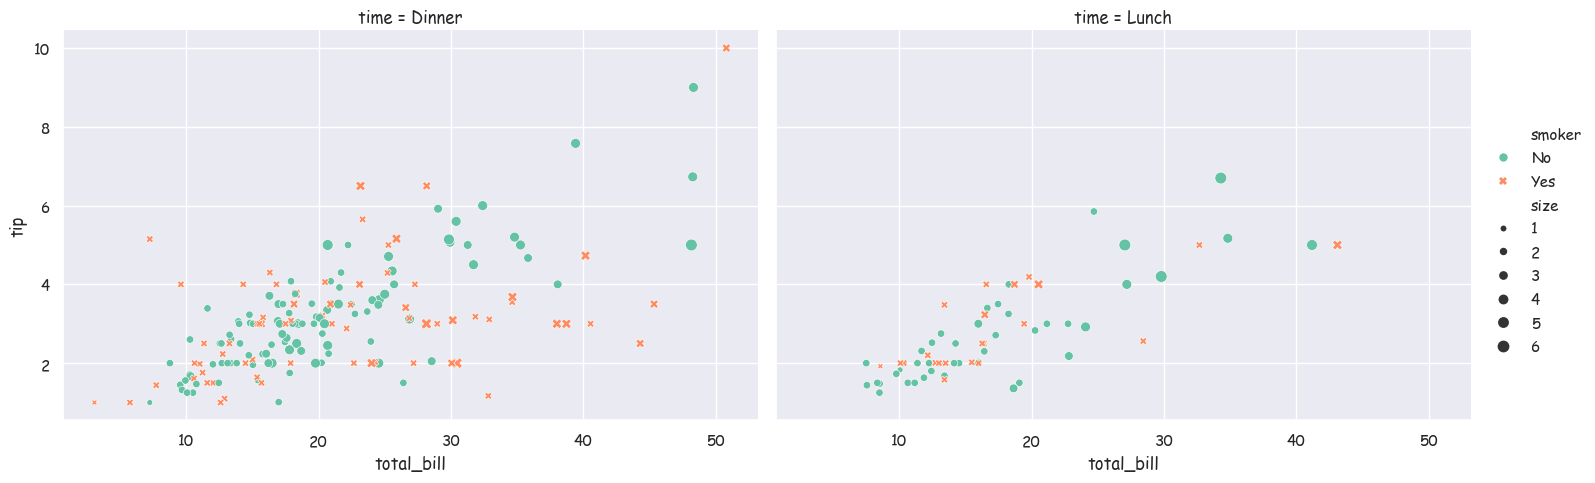

In [76]:
sns.relplot(data=tips, x="total_bill", y="tip",hue="smoker",style="smoker",size="size",col="time",aspect=1.5)

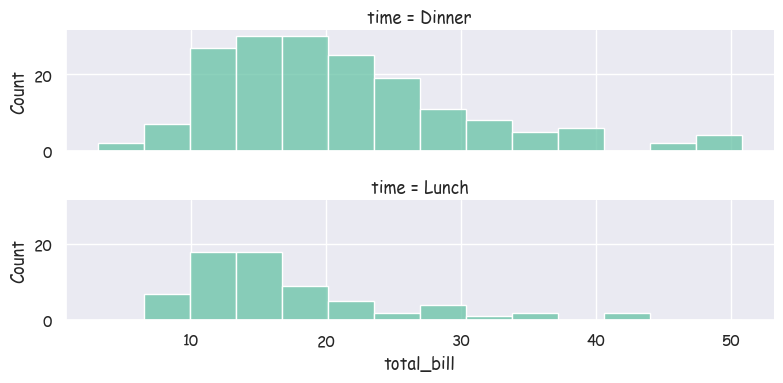

In [79]:
sns.displot(data=tips, x="total_bill", row="time",aspect=4, height=2)
plt.show()

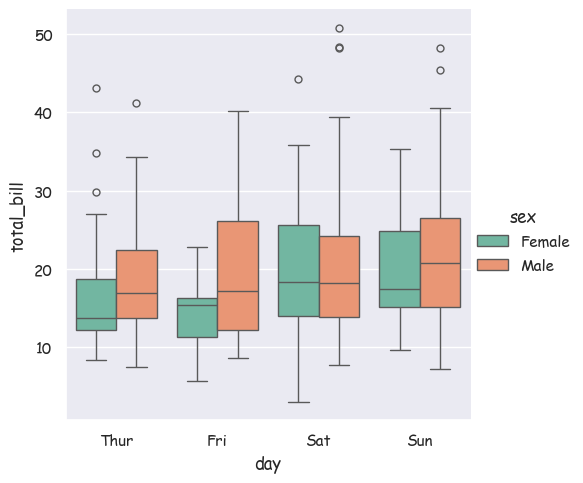

In [84]:
sns.catplot(data=tips, x="day", y="total_bill",hue="sex",kind="box")
plt.show()

All aspects of a graphic can also be adapted as required.
It should be noted that figure level functions (i.e. `relplot`, `displot` and `catplot`) manage their figure themselves.
Basically, these functions return a `FacetGrid`, which offers several methods to customize aspects.
However, direct access to the classic Matplotlib objects, i.e. figure and axes, is also possible.

Instead of using the figure level functions, you can also work directly with the more specific axes level functions. 
This can be particularly useful when combining several axes.

## Pandas

The Pandas library also provides some elementary visualization functions that are based internally on Matplotlib.
The resulting graphs may not be of publication quality, but it is extremely handy to be able to plot something spontaneously during data wrangling.
For both DataFrames and Series, you will find a number of practical plot functions under `.plot.*`.

Details at https://pandas.pydata.org/docs/user_guide/visualization.html